Catherine Johanna Rojas Mendoza
A01798149
26/08/24

# **Valhalla Challenge**

It has happened. Aliens have arrived. They hail from a planet called Valhalla-23,
where the temperature is measured in Valks. These visitors tell you that they have
come to solve Earth’s global warming crisis*. They offer you a machine that will
solve the problem, but they warn you:
1. The machine must be set up in Valks.
2. If you input a wrong temperature value, you may end up freezing or scorching
the Earth.
3. No one knows how to transform between Celsius and Valks.
† You are tasked with finding a model for solving this problem, so you ask Humans
and Valkians to collect temperature readings from several objects. The data are given
in the Valhalla23.csv file



In [43]:
# Importar módulos
import pandas as pd                                       # para cargar datos
import matplotlib.pyplot as plt                           # para graficar
import random                                             # para generar números aleatorios
import numpy as np                                        # para operaciones numéricas
from sklearn.model_selection import train_test_split      # train_test_split
from sklearn.linear_model import SGDRegressor             # para SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score  # para puntajes


# **SGDRegressor Model**

In [44]:
# Cargar datos
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial Avanzada para la Ciencia de Datos/Machine Learning/Regresion lineal/Vallhala/Valhalla23.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Seleccionar las variables independiente (Celsius) y dependiente (Valks)
X = df[['Celsius']].values
y = df['Valks'].values

## 2. Define una semilla que corresponda con los últimos cuatro dígitos de tu matrícula

In [46]:
# Definir la semilla
seed = 8149

## 3. Carga el set de datos de Valhalla y divide el set de datos en entrenamiento (40%), validación (40%), y prueba (20%), utilizando el método train_test_split. y la semilla definida arriba

Entrenamiento: 40\% del total.

Validación:
$
0.6 \times \frac{2}{3} = 0.4,\text{ es decir, 40\% del total.}
$

Prueba:
$
0.6 \times \frac{1}{3} = 0.2, \text{ es decir, 20\% del total.}
$


In [47]:
# Primero, dividimos el conjunto de datos en 60% entrenamiento y 40% temporal
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=seed)

# Luego, dividimos el conjunto temporal en 40% validación y 20% prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.333, random_state=seed)


In [48]:
len(X_train)


40

In [49]:
len(X_val)


40

In [50]:
len(X_test)

20

## 4. Entrena un modelo base de tipo SGDRegressor que utilice una tasa de aprendizaje de 1E-4, un máximo de iteraciones de un millón, y que utilice la semilla definida arriba

In [51]:
# Definir el modelo
model = SGDRegressor(learning_rate='constant', eta0=1E-4, max_iter=1000000, random_state=seed)

# Entrenar el modelo
model.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=1000000,
             random_state=8149)

In [52]:
# Hacer predicciones en cada conjunto
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

## 5. Calcula el error cuadrático medio para este modelo, sobre los datos de entrenamiento, validación, y prueba. Estos datos servirán como línea base.

In [53]:
# Calcular el error cuadrático medio (MSE)
mse_train_base = mean_squared_error(y_train, y_train_pred)
mse_val_base = mean_squared_error(y_val, y_val_pred)
mse_test_base = mean_squared_error(y_test, y_test_pred)


print(f"MSE en entrenamiento: {mse_train_base}")
print(f"MSE en validación: {mse_val_base}")
print(f"MSE en prueba: {mse_test_base}")

MSE en entrenamiento: 1043.0141845601966
MSE en validación: 1286.1501999215811
MSE en prueba: 974.7043290629108


Los valores del MSE en los distintos conjuntos de datos refleja el desempeño del modelo:

- **MSE en Entrenamiento (1043.01):** Un MSE relativamente alto indica que el modelo no captura perfectamente las relaciones en los datos de entrenamiento, sin embargo esto no es necesariamente un problema ya que un MSE muy bajo podría sugerir sobreajuste.
  
- **MSE en Validación (1286.15):** Este valor es un poco más alto que el de entrenamiento y muestra que el modelo tiene un desempeño ligeramente peor con datos no vistos durante el entrenamiento.

- **MSE en Prueba (974.70):** Es el más bajo de los tres, lo que indica que el modelo tuvo un mejor desempeño con datos nuevos. Esto podría deberse a la alineación de los datos de prueba con las relaciones que el modelo aprendió o simplemente a la variabilidad en los datos.

## 6. Realiza una gráfica donde muestres cada subconjunto de datos (entrenamiento, validación, prueba) y el modelo de regresión obtenido (como una recta)

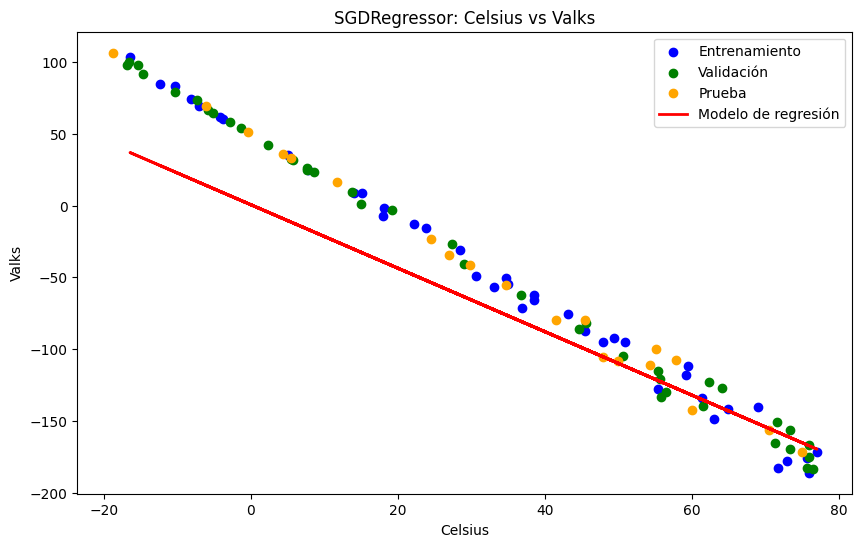

In [54]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_val, y_val, color='green', label='Validación')
plt.scatter(X_test, y_test, color='orange', label='Prueba')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Modelo de regresión')
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('SGDRegressor: Celsius vs Valks')
plt.legend()
plt.show()

El modelo SGDRegressor refleja la tendencia general de la relación entre Celsius y Valks, pero no es perfecto. Hay cierta dispersión de los datos alrededor de la línea de regresión, lo que indica que podrían realizarse mejoras posibles, como un modelo más complejo o ajustes en los hiperparámetros.

## 7. Crea una lista que contenga 20 elementos (enteros) entre 2 y 39 (sin repetición). Estos valores representarán la cantidad de instancias que se usarán para el análisis

In [55]:
# Crear una lista de 20 elementos enteros entre 2 y 39, sin repetición
# Debe incluir el número 2
random.seed(seed)  # Usar la semilla definida
sample_sizes = random.sample(range(3, 40), 19)
sample_sizes.append(2)  # Agregar el número 2
sample_sizes.sort()  # Ordenar la lista de menor a mayor

print("Tamaños de muestra seleccionados:", sample_sizes)

Tamaños de muestra seleccionados: [2, 4, 5, 6, 11, 12, 16, 17, 19, 21, 23, 24, 26, 28, 29, 31, 33, 34, 35, 38]


## 8. Para cada uno de los tamaños del punto anterior, entrena 100 modelos usando un subconjunto aleatorio del set de entrenamiento que contenga esa cantidad de muestras. Por ejemplo, para el tamaño de 2 muestras, se deben entrenar 100 modelos utilizando 2 muestras seleccionadas aleatoriamente de las 40 muestras disponibles en el set de entrenamiento.

## 9. Para cada uno de los modelos del punto anterior, calcula el error cuadrático medio en el subconjunto de entrenamiento (el que tiene un número cambiante de muestras), y en el subconjunto de validación

In [56]:
# Entrenar 100 modelos para cada tamaño de subconjunto y calcular MSE

# Almacenar los resultados
resultados = {}

# Iterar sobre cada tamaño de la lista de sample_sizes
for size in sample_sizes:
    mse_train_list = []
    mse_val_list = []

    for i in range(100):
        # PUNTO 8: Selección de un subconjunto aleatorio y entrenamiento del modelo
        X_subset, _, y_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=seed+i)

        # Definir y entrenar el modelo
        model = SGDRegressor(learning_rate='constant', eta0=1E-4, max_iter=1000000, random_state=seed+i)
        model.fit(X_subset, y_subset)

        # PUNTO 9: Cálculo del MSE en el subconjunto de entrenamiento y validación
        y_train_subset_pred = model.predict(X_subset)
        y_val_pred = model.predict(X_val)

        # Calcular el error cuadrático medio (MSE)
        mse_train = mean_squared_error(y_subset, y_train_subset_pred) # Calcula el MSE para el subconjunto de entrenamiento comparando los valores reales y_subset con las predicciones y_train_subset_pred
        mse_val = mean_squared_error(y_val, y_val_pred)               # Calcula el MSE para el conjunto de validación comparando los valores reales y_val con las predicciones y_val_pred

        mse_train_list.append(mse_train)
        mse_val_list.append(mse_val)

    # Almacenar los MSE para este tamaño de instancia
    resultados[size] = {
        'mse_train': mse_train_list,
        'mse_val': mse_val_list
    }

# Mostrar los resultados obtenidos
for size in resultados:
    print(f"Tamaño de muestra: {size}")
    print(f"  Promedio de MSE en entrenamiento: {np.mean(resultados[size]['mse_train']):.4f} - Desviación estándar de MSE en entrenamiento: {np.std(resultados[size]['mse_train']):.4f}")
    print(f"  Promedio de MSE en validación: {np.mean(resultados[size]['mse_val']):.4f} - Desviación estándar de MSE en validación: {np.std(resultados[size]['mse_val']):.4f}")

Tamaño de muestra: 2
  Promedio de MSE en entrenamiento: 26.6559 - Desviación estándar de MSE en entrenamiento: 51.1841
  Promedio de MSE en validación: 2088.5900 - Desviación estándar de MSE en validación: 10900.7027
Tamaño de muestra: 4
  Promedio de MSE en entrenamiento: 63.8647 - Desviación estándar de MSE en entrenamiento: 199.9003
  Promedio de MSE en validación: 201.5701 - Desviación estándar de MSE en validación: 366.8679
Tamaño de muestra: 5
  Promedio de MSE en entrenamiento: 175.1921 - Desviación estándar de MSE en entrenamiento: 351.2762
  Promedio de MSE en validación: 363.6553 - Desviación estándar de MSE en validación: 558.9958
Tamaño de muestra: 6
  Promedio de MSE en entrenamiento: 307.8134 - Desviación estándar de MSE en entrenamiento: 497.2201
  Promedio de MSE en validación: 420.7664 - Desviación estándar de MSE en validación: 577.0821
Tamaño de muestra: 11
  Promedio de MSE en entrenamiento: 915.5957 - Desviación estándar de MSE en entrenamiento: 410.6783
  Promedi

## 10. Calcula el promedio de las 100 repeticiones para cada uno de los modelos y sus errores. Esto debería generar dos listas de 20 valores cada uno, donde cada elemento representa el error promedio de las 100 repeticiones que se hicieron para cada subconjunto de entrenamiento

In [57]:
# Inicializar listas para almacenar los promedios
promedios_mse_train = []
promedios_mse_val = []

# Iterar sobre los resultados para calcular los promedios
for size in resultados:
    promedio_train = np.mean(resultados[size]['mse_train'])
    promedio_val = np.mean(resultados[size]['mse_val'])

    promedios_mse_train.append(promedio_train)
    promedios_mse_val.append(promedio_val)

# Mostrar las listas de promedios
print("Promedios de MSE en entrenamiento para cada tamaño de muestra:")
print(promedios_mse_train)

print("\nPromedios de MSE en validación para cada tamaño de muestra:")
print(promedios_mse_val)


Promedios de MSE en entrenamiento para cada tamaño de muestra:
[26.655890848354957, 63.864664943776454, 175.1920648760624, 307.81340107510573, 915.595668398634, 934.4944748963918, 1033.615011004959, 1038.102396974433, 1061.8618521273577, 1055.0856024597385, 1049.1111887552436, 1042.3523901904814, 1056.9893910828305, 1033.1319744058264, 1044.5687597170925, 1052.1327268653006, 1053.8547712849158, 1048.0382778437736, 1038.8973205749166, 1028.0261508292087]

Promedios de MSE en validación para cada tamaño de muestra:
[2088.5899745232896, 201.5701286103788, 363.6553420004045, 420.76635523860614, 1186.5575689563127, 1206.4443674030983, 1314.7021386501124, 1311.5420432172386, 1335.5342573081193, 1314.7126997080022, 1314.3200891356744, 1306.5698453798784, 1312.6372634100103, 1304.909735470238, 1315.282333487018, 1320.4441820268607, 1320.8249869109184, 1314.1813771620887, 1297.1904380886608, 1288.8005720839865]


## 11. Agrega a las listas anteriores los errores de entrenamiento y validación de la línea base



In [58]:
# Agregar los errores de la línea base al final de las listas de promedios
promedios_mse_train.append(mse_train_base)
promedios_mse_val.append(mse_val_base)

# Mostrar las listas de promedios incluyendo la línea base
print("Promedios de MSE en entrenamiento para cada tamaño de muestra (incluyendo línea base):")
print(promedios_mse_train)

print("\nPromedios de MSE en validación para cada tamaño de muestra (incluyendo línea base):")
print(promedios_mse_val)

Promedios de MSE en entrenamiento para cada tamaño de muestra (incluyendo línea base):
[26.655890848354957, 63.864664943776454, 175.1920648760624, 307.81340107510573, 915.595668398634, 934.4944748963918, 1033.615011004959, 1038.102396974433, 1061.8618521273577, 1055.0856024597385, 1049.1111887552436, 1042.3523901904814, 1056.9893910828305, 1033.1319744058264, 1044.5687597170925, 1052.1327268653006, 1053.8547712849158, 1048.0382778437736, 1038.8973205749166, 1028.0261508292087, 1043.0141845601966]

Promedios de MSE en validación para cada tamaño de muestra (incluyendo línea base):
[2088.5899745232896, 201.5701286103788, 363.6553420004045, 420.76635523860614, 1186.5575689563127, 1206.4443674030983, 1314.7021386501124, 1311.5420432172386, 1335.5342573081193, 1314.7126997080022, 1314.3200891356744, 1306.5698453798784, 1312.6372634100103, 1304.909735470238, 1315.282333487018, 1320.4441820268607, 1320.8249869109184, 1314.1813771620887, 1297.1904380886608, 1288.8005720839865, 1286.15019992158

## 12. Haz una gráfica donde se muestre la evolución del error promedio de entrenamiento y validación, para cada uno de los diferentes tamaños de entrenamiento

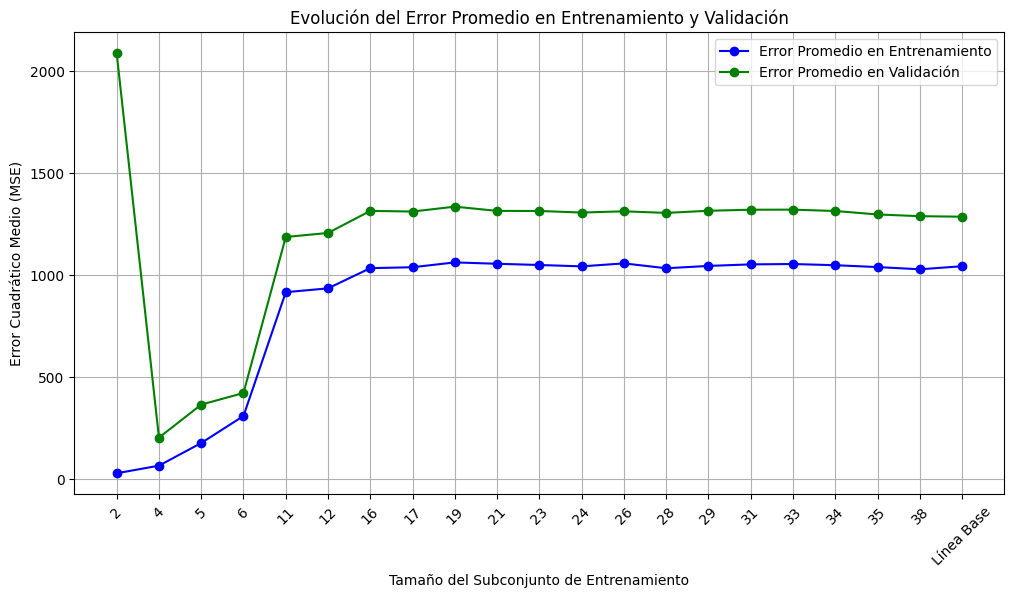

In [59]:
# Crear un rango de tamaños de entrenamiento, incluyendo la línea base (el último valor)
tamaños_entrenamiento = sample_sizes + ['Línea Base']

# Graficar la evolución del error promedio
plt.figure(figsize=(12, 6))

# Graficar los errores de entrenamiento
plt.plot(tamaños_entrenamiento, promedios_mse_train, marker='o', color='blue', label='Error Promedio en Entrenamiento')

# Graficar los errores de validación
plt.plot(tamaños_entrenamiento, promedios_mse_val, marker='o', color='green', label='Error Promedio en Validación')

# Configurar la gráfica
plt.xlabel('Tamaño del Subconjunto de Entrenamiento')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Evolución del Error Promedio en Entrenamiento y Validación')
plt.legend()
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.grid(True)
plt.show()


## 13. Con base en la grafica anterior, explica el tipo de ajuste obtenido para el primer modelo (el entrenado sobre 2 muestras) y para el modelo final (el entrenado sobre 40 muestras). También explica como cambia el tipo de ajuste a medida que se incrementa el número de muestras del entrenamiento. Incluye también en tu análisis el grado de sesgo y de varianza para los diferentes modelos.

### 1. **Modelo Entrenado sobre 2 Muestras:**
   - **Error Promedio en Entrenamiento:** El error cuadrático medio (MSE) es muy bajo en comparación con los otros modelos, lo que indica un ajuste casi perfecto a las dos muestras de entrenamiento seleccionadas. Esto sugiere que el modelo está sobreajustado (overfitting) a esas dos muestras, capturando perfectamente los pocos datos disponibles pero sin generalizar bien.
   - **Error Promedio en Validación:** El MSE en validación es extremadamente alto, lo que confirma que el modelo no generaliza adecuadamente a datos no vistos. Este comportamiento es característico de un modelo con alto **sesgo** (bias) debido a la falta de suficientes datos para capturar la verdadera relación entre las variables. El modelo tiene un **alto nivel de varianza**, reaccionando de manera excesiva a las pequeñas variaciones en los datos de entrenamiento.
  
En pocas palabras, este muestra un comportamiento de sobreajuste extremo con alta varianza y alto sesgo.

### 2. **Modelo Final (Línea Base - 40 Muestras):**
   - **Error Promedio en Entrenamiento:** El MSE es relativamente estable y más bajo en comparación con otros tamaños de muestra más pequeños, lo que indica que el modelo está capturando una tendencia general sin sobreajustarse a los datos.
   - **Error Promedio en Validación:** Aunque el MSE es un poco más alto en comparación con el entrenamiento, sigue siendo estable y bajo, lo que sugiere que el modelo generaliza bien a datos no vistos. Este modelo tiene un buen balance entre **sesgo** y **varianza**, logrando capturar las relaciones subyacentes sin reaccionar demasiado a las variaciones específicas del conjunto de datos de entrenamiento.

De manera resumida podemos decir que, en este caso se logra un buen equilibrio entre sesgo y varianza, capturando la relación subyacente de manera efectiva.

### 3. **Evolución del Ajuste con el Incremento del Número de Muestras:**
   - **Para muestras pequeñas (2-6):** El modelo muestra una tendencia de **sobreajuste** con un bajo MSE en entrenamiento y un MSE extremadamente alto en validación, lo que indica una **alta varianza** y un **alto sesgo**.
   Los modelos con 4, 5 y 6 muestras, son aquellos que tienen los menores valores de error tanto en entrenamineto como validación.
   - **Para muestras intermedias (11-16):** Aquí el MSE en validación comienza a disminuir y estabilizarse, lo que sugiere que el modelo empieza a capturar mejor la relación entre las variables, reduciendo el sesgo y mejorando su capacidad de generalización.
   - **Para muestras grandes (19 en adelante):** El MSE en validación y entrenamiento se estabiliza, indicando que el modelo alcanza un equilibrio donde no está sobreajustando ni subajustando los datos. A medida que se incrementa el número de muestras, el sesgo disminuye, y la varianza también se reduce, permitiendo que el modelo capture una mejor representación de los datos.


Entonces, a medida que se incrementa el número de muestras, el error en validación disminuye significativamente hasta que se estabiliza, lo que refleja una mejora continua en la generalización del modelo. Esto sugiere que, para este conjunto de datos, un tamaño de muestra mayor permite al modelo aprender mejor las relaciones verdaderas entre las variables y reducir tanto el sesgo como la varianza.

## 14. Con base en la gráfica y los datos, identifica la cantidad de muestras más adecuada para realizar el entrenamiento. Justifica tu selección.

### Selección de la Cantidad de Muestras:
La cantidad de muestras más adecuada para realizar el entrenamiento parece estar alrededor de 16 muestras.

Con 16 muestras, el modelo ha reducido significativamente el sesgo, y la varianza también se encuentra en un nivel controlado, lo que sugiere que el modelo es capaz de generalizar adecuadamente sin estar sobreajustado a los datos específicos del conjunto de entrenamiento.
Por otro lado, entrenar con 16 muestras es más eficiente que entrenar con 40, y como el MSE en validación se estabiliza, no es necesario utilizar más datos para obtener un modelo eficaz. Esto mismo nos indica que el modelo no se beneficiaría significativamente de un mayor tamaño de muestra en términos de precisión predictiva.


Por otro lado, al observar la gráfica con 4 muestras, el error de validación y entrenamiento es comparativamente uno de los puntos más bajos en la gráfica, sin embargo, el error de entrenamiento es más bajo que el de validación, lo que puede indicar un potencial sobreajuste o que el modelo aún no ha capturado completamente la complejidad de los datos, por loque también se decide analizar esta opción.

## 15. Entrena un nuevo modelo utilizando esa cantidad de muestras, y calcula su error cuadrático medio sobre el subconjunto de entrenamiento (el de la cantidad de muestras seleccionadas), el de validación, y el de prueba.

In [60]:
# Seleccionar 34 muestras aleatorias del conjunto de entrenamiento original
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, train_size=16, random_state=seed) # 16 muestras

# Definir y entrenar el modelo
model = SGDRegressor(learning_rate='constant', eta0=1E-4, max_iter=1000000, random_state=seed)
model.fit(X_subset, y_subset)

# Hacer predicciones en los subconjuntos de entrenamiento, validación, y prueba
y_train_subset_pred = model.predict(X_subset)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) en cada subconjunto
mse_train_subset = mean_squared_error(y_subset, y_train_subset_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Mostrar los resultados
print(f"MSE en el subconjunto de entrenamiento (16 muestras): {mse_train_subset:.4f}")
print(f"MSE en el subconjunto de validación: {mse_val:.4f}")
print(f"MSE en el subconjunto de prueba: {mse_test:.4f}")

MSE en el subconjunto de entrenamiento (16 muestras): 853.7891
MSE en el subconjunto de validación: 1383.8250
MSE en el subconjunto de prueba: 955.0762


In [61]:
# Seleccionar 34 muestras aleatorias del conjunto de entrenamiento original
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, train_size=4, random_state=seed) # 4 muestras

# Definir y entrenar el modelo
model = SGDRegressor(learning_rate='constant', eta0=1E-4, max_iter=1000000, random_state=seed)
model.fit(X_subset, y_subset)

# Hacer predicciones en los subconjuntos de entrenamiento, validación, y prueba
y_train_subset_pred = model.predict(X_subset)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) en cada subconjunto
mse_train_subset = mean_squared_error(y_subset, y_train_subset_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Mostrar los resultados
print(f"MSE en el subconjunto de entrenamiento (4 muestras): {mse_train_subset:.4f}")
print(f"MSE en el subconjunto de validación: {mse_val:.4f}")
print(f"MSE en el subconjunto de prueba: {mse_test:.4f}")

MSE en el subconjunto de entrenamiento (4 muestras): 7.9979
MSE en el subconjunto de validación: 40.4030
MSE en el subconjunto de prueba: 51.3443


## 16. Compara los valores del punto anterior contra los errores obtenidos para la línea base (ver punto 5)

Resultados de la Línea Base:

* MSE en entrenamiento: 1043.0141845601966
* MSE en validación: 1286.1501999215811
* MSE en prueba: 974.7043290629108

Resultados Utilizando 16 Muestras Aleatorias:
* MSE en entrenamiento: 853.7891
* MSE en validación: 1383.8250
* MSE en prueba: 955.0762

Resultados Utilizando 4 Muestras Aleatorias:
* MSE en entrenamiento 7.9979
* MSE en validación: 40.4030
* MSE en prueba: 51.3443



* El **modelo con 16 muestras** tiene un MSE en entrenamiento inferior al de la línea base, lo que sugiere que es capaz de ajustarse mejor a los datos de entrenamiento sin sobreajustarse. Y el **modelo con 4 muestras** tiene un MSE extremadamente bajo en el entrenamiento, lo que sugiere un posible sobreajuste, ya que ha ajustado demasiado a las pocas muestras disponibles.


* Para el conjunto de validación, el **modelo con 4 muestras** tiene un MSE significativamente mejor que la línea base y el de 16 muestras. Sin embargo, esto podría ser engañoso debido a la posibilidad de sobreajuste. Y el modelo con **16 muestras** tiene un MSE de validación más alto que la línea base, lo cual podría indicar que, aunque se ajusta bien en el entrenamiento, no generaliza tan bien como se esperaría.


* El **modelo con 16** muestras tiene un MSE en prueba menor que la línea base, lo que indica que, aunque su MSE de validación es mayor, aún generaliza mejor en datos no vistos que la línea base. Y el **modelo con 4 muestras** nuevamente muestra un MSE extremadamente bajo en el conjunto de prueba, lo que podría indicar sobreajuste, ya que parece estar ajustándose demasiado a las pequeñas variaciones en los datos de validación y prueba.

Como conclusión, 16 muestras parece ser una opción más robusta y equilbrada comparada con la línea base, con un mejor desempeño en los datos de prueba y un menor riesgo de sobreajuste en comparación con las 4 muestras.

## 17. Argumenta cuál configuración funcionó mejor, y por qué


La configuración que funcionó mejor es la de 16 muestras.

Aunque no tiene los MSE más bajos en validación y prueba, esta configuración mantiene un buen equilibrio entre el rendimiento en el conjunto de entrenamiento y la capacidad de generalizar en los conjuntos de validación y prueba, además muestra un riesgo de sobreajuste mucho menor que el modelo con 4 muestras, lo que lo hace más confiable y robusto para datos nuevos.


In [64]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Valhalla.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Valhalla.ipynb to html
[NbConvertApp] Writing 806001 bytes to /content/drive/MyDrive/Colab Notebooks/Valhalla.html
